# time series clustering
### https://towardsdatascience.com/hands-on-climate-time-series-clustering-using-machine-learning-with-python-6a12ce1607f9

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [2]:
time_series_data = pd.read_csv('temperature.csv')
city_data = pd.read_csv('city_attributes.csv')
cities_list = city_data.City.tolist()
time_series_data = time_series_data.dropna().reset_index().drop('index',axis=1)
time_series_data['datetime'] = pd.to_datetime(time_series_data['datetime'])
time_series_data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
1,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
3,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
4,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5


In [4]:
undersample_data = time_series_data.loc[np.linspace(time_series_data.index.min(),time_series_data.index.max(),1500).astype(int)]
undersample_data = undersample_data.reset_index().drop('index',axis=1)

In [5]:
data_array = np.array(undersample_data.T.drop('datetime').values)
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data_array)
cities_list = undersample_data.T.drop('datetime').index.tolist()

In [6]:
y=model.predict(data_array)

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 36 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [7]:
x = undersample_data.datetime

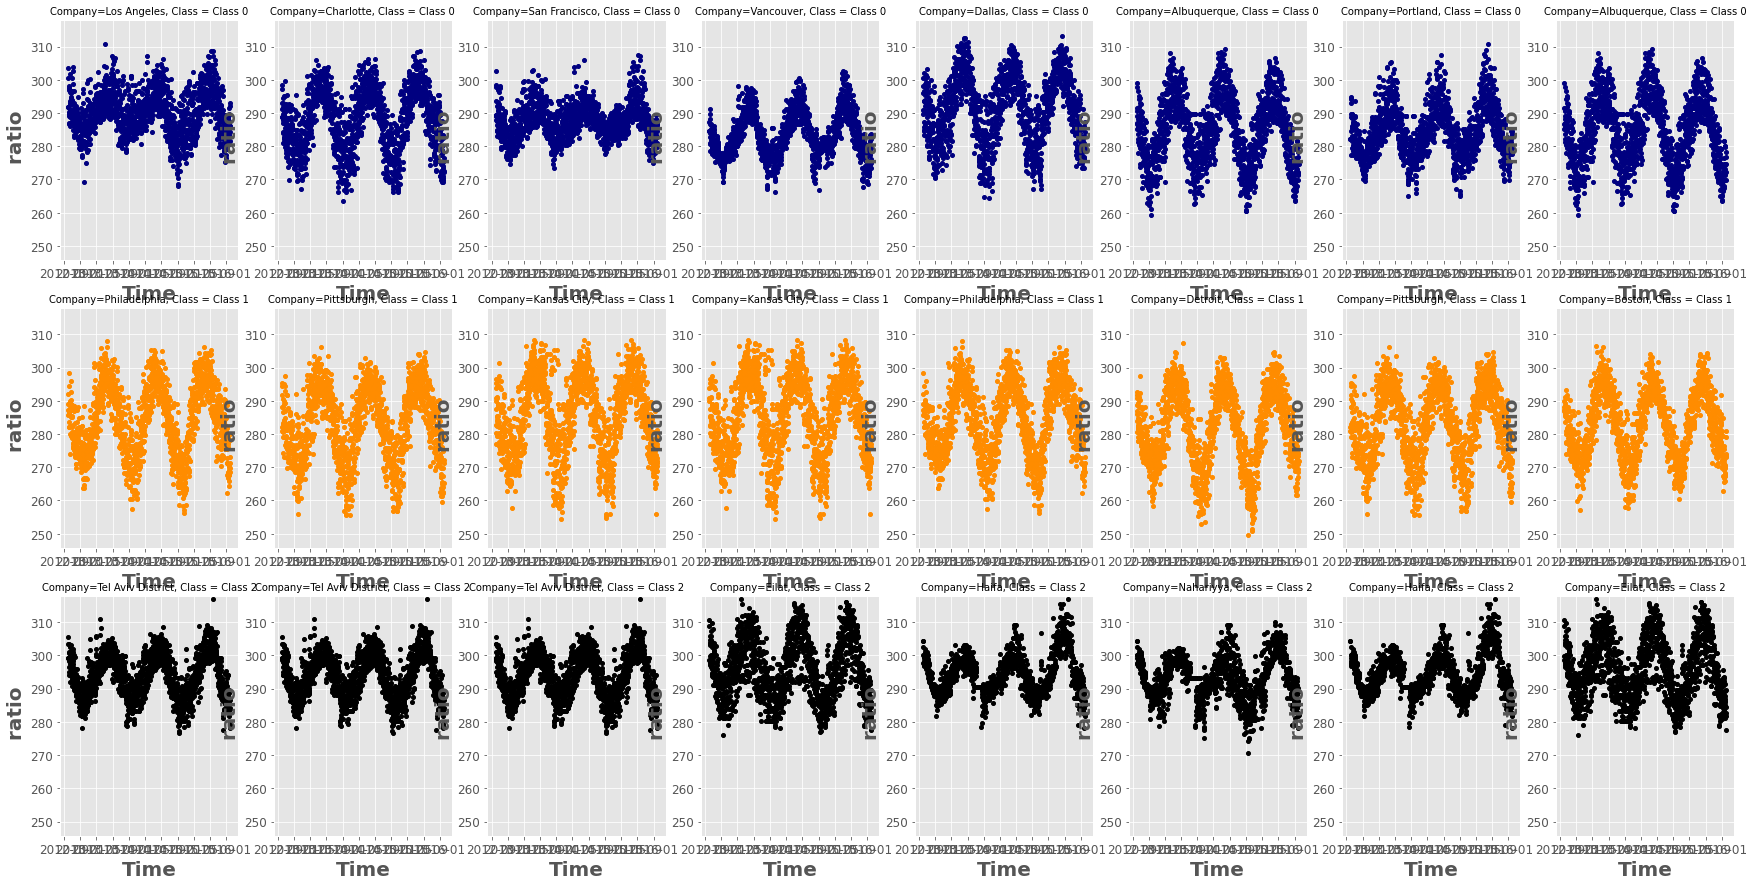

In [9]:
plt.figure(figsize=(30,15))
k_dict = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':1,'10':1,'11':1,'12':1,'13':1,'14':1,'15':1,'16':1,'17':2,'18':2,'19':2,'20':2,'21':2,'22':2,'23':2,'24':2} #{'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*8+['darkorange']*8+['k']*8
Names = ['Class 0']*8+['Class 1']*8+['Class 2']*8
to_delete = []
for j in range(1,25):
    plt.subplot(3,8,j)
    #k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    y_0 = np.where(y==k_dict[str(j)])[0]
    y_0 = np.delete(y_0, to_delete)
    k = np.random.choice(y_0)
    to_delete.append(np.where(y_0 == k)[0][0])

    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel(' ratio',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('Company=%s, Class = %s'%(cities_list[k],Names[j-1]),fontsize=10)
    plt.ylim(data_array.min(),data_array.max())

In [10]:
naive_data = city_data[['Latitude','Longitude']].reset_index().drop('index',axis=1)
from sklearn.cluster import KMeans
naive_k = KMeans(n_clusters=3).fit(X=naive_data).predict(naive_data)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

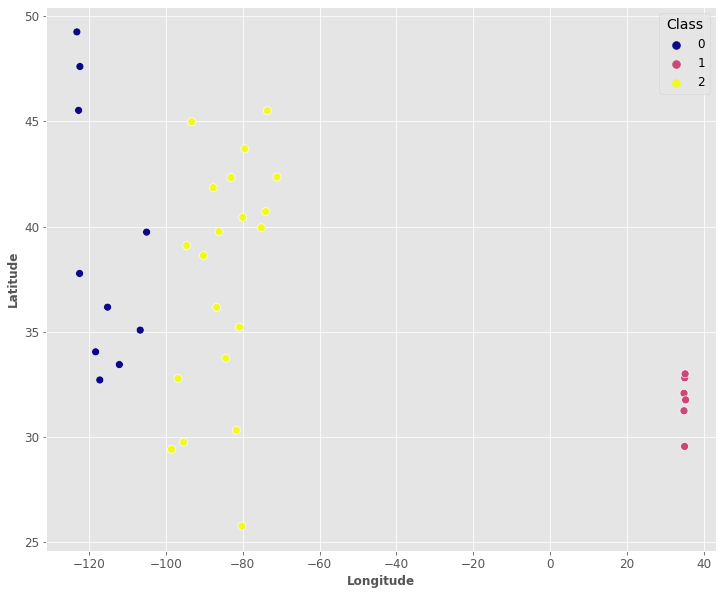

In [13]:
data_c = naive_data.copy()
data_c['Class']=naive_k
sns.scatterplot(x='Longitude',y='Latitude',hue='Class',data=data_c,palette='plasma')